<a href="https://colab.research.google.com/github/maiali13/DS-Unit-1-Sprint-2-Statistics/blob/master/Sprint_2_M_Ali_LS_DS13_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


**1-3**

Generate and numerically represent a confidence interval

Graphically (with a plot) represent the confidence interval

Interpret the confidence interval - what does it tell you about the data and its distribution?

In [66]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'y': 1, 'n': 0, "?": np.NaN})
gop = df[df['party']== 'republican']
dem = df[df['party']== 'democrat']
df.head()

--2020-02-19 17:36:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-02-19 17:36:48 (278 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  # stderr = stats.sem(data)
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [0]:
#calculate confidence intervals for every column in the df
df = df.drop('party', axis=1)

In [0]:
confidence_intervals = []

In [70]:
for column in df:
  col = df[column]
  #remember to clean NaNs out of columns
  col_cleaned = col[~np.isnan(df[column])]
  confidence_intervals.append(confidence_interval(col_cleaned))

ci_df = pd.DataFrame(confidence_intervals)
ci_df.columns = ['lower', 'mean', 'upper']

ci_df.head()

,lower,mean,upper
0,0.394560,0.442080,0.489600
1,0.453841,0.503876,0.553911
2,0.549815,0.596698,0.643581
3,0.370323,0.417453,0.464582
4,0.456750,0.504762,0.552774


In [71]:
#we need to add a column for the margin of error
ci_df['moe'] = ci_df['upper'] - ci_df['mean']
ci_df.head()

,lower,mean,upper,moe
0,0.394560,0.442080,0.489600,0.047520
1,0.453841,0.503876,0.553911,0.050035
2,0.549815,0.596698,0.643581,0.046883
3,0.370323,0.417453,0.464582,0.047129
4,0.456750,0.504762,0.552774,0.048012


In [72]:
ci_df = ci_df.drop(columns=['upper', 'lower'])
ci_df.head()

,mean,moe
0,0.442080,0.047520
1,0.503876,0.050035
2,0.596698,0.046883
3,0.417453,0.047129
4,0.504762,0.048012


Text(0, 0.5, 'CI values')

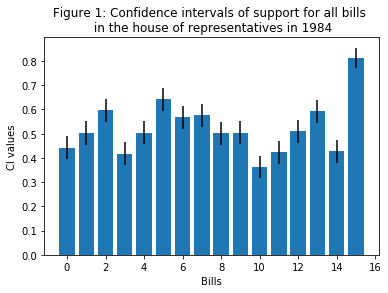

In [73]:
#now we can plot!
plt.bar(x=range(0,len(ci_df)), height = ci_df['mean'], yerr= ci_df['moe']);
plt.title('Figure 1: Confidence intervals of support for all bills \n in the house of representatives in 1984')
plt.xlabel('Bills')
plt.ylabel('CI values')

Figure 1 (above) illustrates the ranges of confidence intervals of support (and error margin) for all bills introduced to the in the house of representatives in 1984. Only CI ranges for one bill (#15) are approaching a high CI range (.95%) which **may** be considerd accurate for predictive purposes. The majority of bills are between .3-.7 CI, indicating that we cannot preccisely predict whether representatives will support a bill. There appears to be a large diversity in support for instroduced legislature across representatives, and we suggest that calculating CI for voting records by party alignment would yeild more useful results. Much more data must be collected in order to develop a better model. 

In [74]:
#awesome, lets do this for GOP votes across bills
gop.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
#i wanted to run CI values for the GOP but i cannot get NaNs out of this DF for some reason

#start loop for CI values 
#for column in gop[column]:
  #col = gop[column]
  #Clean NaNs out of individual columns
  #col_cleaned = col[~np.isnan(df[column])]
  #confidence_intervals.append(confidence_interval(col_cleaned))

#ci_df = pd.DataFrame(confidence_intervals)
#ci_df.columns = ['lower', 'mean', 'upper']

#ci_df.head()

**4**

Take a dataset that we have used in the past in class that has categorical variables. 

Pick two of those categorical variables and run a chi-squared tests on that data:

a) By hand using Numpy

b) In a single line using Scipy

Using census data [provided by UCI](https://archive.ics.uci.edu/ml/datasets/Adult), we want to test the independence of an individual American's sex and their hours worked per week in the year of the census. 

```
Null Hypothesis: sex and hours worked (per week) are independent of one another

Alternative Hypothesis: sex and hours worked (per week) are dependent 

95% confidence
```
We will usee the traditional chi squared formula: 
\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}

Since we are comparing the independence of two variables, we must calculate our expected value via: 

\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}



Using this formula, we find a **chi-squared value of 2,372,627.0 with 5 degress of freedom, and p-value of 0.0**. Such an enormous chi-squared statistic is indicative of very high dependence between our variables. Therefore, we may with very high confidence **reject our null hypothesis** that an American's sex and hours worked per week are independent of each other. 



In [78]:
column_headers = column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']
adult_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names= column_headers) 
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
#we need to bin hours worked into categories to make our data more manageable 
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
adult_data['hours_per_week_categories'] = pd.cut(adult_data['hours-per-week'], cut_points, labels=label_names)

adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [80]:
#make contingency table for sex and hours worked per week (categories)
work_data = pd.crosstab(adult_data['sex'], adult_data['hours_per_week_categories'], margins = True)
print(work_data)

hours_per_week_categories  0-9  10-19  20-29  30-39  40-49   50+    All
sex                                                                    
 Female                    235    671   1287   1914   5636  1028  10771
 Male                      223    575   1105   1753  12700  5434  21790
All                        458   1246   2392   3667  18336  6462  32561


In [81]:
adult_data['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [82]:
#sort out the margins for relevant data points
row_sums = work_data.iloc[0:2, 6].values
col_sums = work_data.iloc[2, 0:6].values
total_sum = df.shape[0]
print(total_sum)
print(row_sums)
print(col_sums)

435
[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [83]:
#expected value calc
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_sum
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 6)
[[ 11340.50114943  30852.10574713  59228.11954023  90798.29195402
  454016.22068966 160005.06206897]
 [ 22942.11494253  62414.57471264 119819.95402299 183687.1954023
  918486.06896552 323694.20689655]]


In [84]:
# Get a crosstab without the margins:
observed = pd.crosstab(adult_data['sex'], adult_data['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [85]:
chi_squared = ((observed - expected)**2 / expected ).sum()
chi_squared

2372627.971912126

https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html

In [86]:
# b) scipy function
stats.chisquare(observed, expected)

Power_divergenceResult(statistic=array([  33373.65339189,   90794.57122582,  174302.22998369,
        267208.56346278, 1336075.85719336,  470873.09665459]), pvalue=array([0., 0., 0., 0., 0., 0.]))

**stretch**


1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.